## 철새 수 위험도 테이블


In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
#지우파일 시도-시군구-year-month-철새수 데이터 파일 불러오기

df894=pd.read_csv("./data/month_local.csv")
month_local_br=df894.copy()
month_local_br.head()

,시도,시군구,year,month,철새수
0,강원도,철원군,2014,10,51660
1,강원도,철원군,2014,11,43900
2,강원도,철원군,2014,12,9336
3,강원도,철원군,2015,1,10857
4,강원도,철원군,2015,2,14109


In [3]:
#철새데이터 년도-월 컬럼 추가하여 데이터프레임 생성

#발생건수 데이터 불러오기
AI=pd.read_csv("HPAIOccurlist_final.csv")
AI_occur_m=AI.copy()
AI_occur_m.head()

#불필요한 컬럼 삭제
AI_occur_m.drop(columns=['축종'],inplace=True)
AI_occur_m.drop(columns=['사육수'],inplace=True)
AI_occur_m.drop(columns=['진단일'],inplace=True)

#datetime으로 만들기
AI_occur_m['datetime'] =AI_occur_m['발생일'].apply(lambda x: pd.to_datetime(str(x), format='%Y/%m/%d'))
AI_occur_m

# DataFrame의 index 변형하기
AI_occur_m.set_index('datetime', inplace=True) 

#년도와 월 컬럼 생성
AI_occur_m['month']=AI_occur_m.index.month
AI_occur_m['year']=AI_occur_m.index.year
AI_occur_m=AI_occur_m.reset_index()
AI_occur_m

,datetime,주소,발생일,month,year
0,2021-02-23,강원도 원주시 귀래면 주포리,20210223,2,2021
1,2017-01-03,강원도 인제군 기린면 북리,20170103,1,2017
2,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,12,2016
3,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,11,2016
4,2008-05-07,강원도 춘천시 사북면 지촌리,20080507,5,2008
...,...,...,...,...,...
1117,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,12,2016
1118,2016-12-06,충청북도 충주시 대소원면 만정리,20161206,12,2016
1119,2021-02-02,충청북도 충주시 동량면 대전리,20210202,2,2021
1120,2021-03-11,충청북도 충주시 소태면 주치리,20210311,3,2021


In [4]:
#지역별로 보기 위해 '시도', '시군' 나누기

#지역별로 보기 위해 주소컬럼만 추출
AI_occur_address=AI_occur_m['주소']
AI_occur_address=AI_occur_address.to_frame()

#주소 나누기(리스트 형태)
AI_occur_address_d=AI_occur_address['주소'].str.split(' ',1).tolist()
AI_occur_address_d

[['강원도', '원주시 귀래면 주포리'],
 ['강원도', '인제군 기린면 북리'],
 ['강원도', '철원군 갈말읍 강포리'],
 ['강원도', '철원군 갈말읍 강포리'],
 ['강원도', '춘천시 사북면 지촌리'],
 ['강원도', '춘천시 사북면 지촌리'],
 ['강원도', '횡성군 횡성읍 학곡리'],
 ['강원도', '횡성군 횡성읍 학곡리'],
 ['경기도', '고양시 덕양구 관산동'],
 ['경기도', '고양시 덕양구 내유동'],
 ['경기도', '과천시 문원동'],
 ['경기도', '광주시 남한산성면 불당리'],
 ['경기도', '광주시 오포읍 양벌리'],
 ['경기도', '광주시 초월읍 신월리'],
 ['경기도', '김포시 대곶면 쇄암리'],
 ['경기도', '김포시 대곶면 초원지리'],
 ['경기도', '김포시 월곶면 군하리'],
 ['경기도', '김포시 통진읍 가현리'],
 ['경기도', '김포시 통진읍 가현리'],
 ['경기도', '김포시 통진읍 가현리'],
 ['경기도', '김포시 통진읍 수참리'],
 ['경기도', '김포시 하성면 마조리'],
 ['경기도', '남양주시 화도읍 차산리'],
 ['경기도', '동두천시 하봉암동'],
 ['경기도', '성남시 수정구 태평동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '성남시 중원구 성남동'],
 ['경기도', '수원시 영통구 하동'],
 ['경기도', '수원시 팔달구 인계동'],
 ['경기도', '수원시 팔달구 화서동'],
 ['경기도', '안성시 공도읍 건천리'],
 ['경기도', '안성시 공도읍 건천리'],
 ['경기도', '안성시 공도읍 마정리'],
 ['경기도', '안성시 공도읍 마정리'],
 ['경기도', '안성시 공도읍 신두리'],
 ['경기도', '안성시 공도읍 용두리'],
 ['경기도', '안성시 공도읍 용두리'],
 ['경기도', '안성시 공도읍 중복리'],
 ['경

In [5]:
#리스트형태 데이터프레임으로 만들어주기
AI_occur_address_de=pd.DataFrame(AI_occur_address['주소'].str.split(' ',1).tolist())

#컬럼명 넣기
AI_occur_address_t=pd.DataFrame(AI_occur_address['주소'].str.split(' ',1).tolist(),
                                    columns=['시도','시도 외'])
AI_occur_address_t

#필요없는 행 삭제
AI_occur_address_total=AI_occur_address_t.drop(columns='시도 외',inplace=False)
AI_occur_address_total

,시도
0,강원도
1,강원도
2,강원도
3,강원도
4,강원도
...,...
1117,충청북도
1118,충청북도
1119,충청북도
1120,충청북도


In [6]:
#발생건수 데이터와 '시도', '시군' 합쳐주기
AI_occur_month=pd.concat([AI_occur_address_total,AI_occur_m],axis=1)
AI_occur_month.head()

,시도,datetime,주소,발생일,month,year
0,강원도,2021-02-23,강원도 원주시 귀래면 주포리,20210223,2,2021
1,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,1,2017
2,강원도,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,12,2016
3,강원도,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,11,2016
4,강원도,2008-05-07,강원도 춘천시 사북면 지촌리,20080507,5,2008


In [7]:
#발생건수 '시도' '시군' 별 카운트
AI_occur_local=AI_occur_month.groupby(['시도'])['발생일'].count()
AI_occur_local=AI_occur_local.to_frame()
AI_occur_local

,발생일
시도,
강원도,8
경기도,261
경상남도,25
경상북도,21
광주광역시,2
대구광역시,4
부산광역시,8
서울특별시,4
세종특별자치시,22


In [8]:
#년-월-시도 발생일 카운트
AI_occur_local_ym=AI_occur_month.groupby(['year','month','시도'])['발생일'].count()
# 데이터프레임으로 변환
AI_occur_local_ym=AI_occur_local_ym.to_frame()
AI_occur_local_ym

발생일
year month 시도          
2003 12    경기도        2
           경상북도       4
           울산광역시      2
           전라남도       2
           충청남도       3
...                 ...
2021 2     제주특별자치도    1
           충청북도       4
     3     전라남도       4
           충청북도       2
     4     전라남도       2

[188 rows x 1 columns]

In [46]:
#철새 수 2014년 10,11,12만 2021년도는 1,2,3월만 있어 해당년도 삭제.
AI_occur_local_ym=AI_occur_month.query('2014 < year < 2021')
AI_occur_local_ym

,시도,datetime,주소,발생일,month,year
1,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,1,2017
2,강원도,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,12,2016
3,강원도,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,11,2016
6,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,1,2017
8,경기도,2017-03-03,경기도 고양시 덕양구 관산동,20170303,3,2017
...,...,...,...,...,...,...
1114,충청북도,2016-12-12,충청북도 청주시 흥덕구 오송읍 동평리,20161212,12,2016
1115,충청북도,2016-12-01,충청북도 청주시 흥덕구 오송읍 동평리,20161201,12,2016
1116,충청북도,2016-11-29,충청북도 청주시 흥덕구 오송읍 쌍청리,20161129,11,2016
1117,충청북도,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,12,2016


In [10]:
# 발생건수 열 만들기
month_local_br['발생건수']=np.nan
month_local_br.head()

,시도,시군구,year,month,철새수,발생건수
0,강원도,철원군,2014,10,51660,NaN
1,강원도,철원군,2014,11,43900,NaN
2,강원도,철원군,2014,12,9336,NaN
3,강원도,철원군,2015,1,10857,NaN
4,강원도,철원군,2015,2,14109,NaN


In [11]:
month=pd.DataFrame(columns=AI_occur_local_ym.columns)
month.head()

,시도,datetime,주소,발생일,month,year


In [12]:
AI_occur_local_ym.head()

,시도,datetime,주소,발생일,month,year
1,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,1,2017
2,강원도,2016-12-09,강원도 철원군 갈말읍 강포리,20161209,12,2016
3,강원도,2016-11-30,강원도 철원군 갈말읍 강포리,20161130,11,2016
6,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,1,2017
8,경기도,2017-03-03,경기도 고양시 덕양구 관산동,20170303,3,2017


In [13]:
for n1, group in AI_occur_local_ym.groupby(['month']):
    group.reset_index(inplace=True, drop=True)
    if group.loc[0,'month'] in [1,2,3,10,11,12]:
        month=pd.concat([month, group])

In [42]:
month

,시도,datetime,주소,발생일,month,year,발생건수
0,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,1,2017,1
1,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,1,2017,1
2,경기도,2015-01-19,경기도 광주시 오포읍 양벌리,20150119,1,2015,1
3,경기도,2015-01-31,경기도 김포시 통진읍 가현리,20150131,1,2015,1
4,경기도,2017-01-21,경기도 김포시 하성면 마조리,20170121,1,2017,1
...,...,...,...,...,...,...,...
290,충청북도,2016-12-10,충청북도 청주시 흥덕구 강내면 궁현리,20161210,12,2016,1
291,충청북도,2016-12-12,충청북도 청주시 흥덕구 오송읍 동평리,20161212,12,2016,1
292,충청북도,2016-12-01,충청북도 청주시 흥덕구 오송읍 동평리,20161201,12,2016,1
293,충청북도,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,12,2016,1


In [43]:
month['발생건수']=1
month

,시도,datetime,주소,발생일,month,year,발생건수
0,강원도,2017-01-03,강원도 인제군 기린면 북리,20170103,1,2017,1
1,강원도,2017-01-06,강원도 횡성군 횡성읍 학곡리,20170106,1,2017,1
2,경기도,2015-01-19,경기도 광주시 오포읍 양벌리,20150119,1,2015,1
3,경기도,2015-01-31,경기도 김포시 통진읍 가현리,20150131,1,2015,1
4,경기도,2017-01-21,경기도 김포시 하성면 마조리,20170121,1,2017,1
...,...,...,...,...,...,...,...
290,충청북도,2016-12-10,충청북도 청주시 흥덕구 강내면 궁현리,20161210,12,2016,1
291,충청북도,2016-12-12,충청북도 청주시 흥덕구 오송읍 동평리,20161212,12,2016,1
292,충청북도,2016-12-01,충청북도 청주시 흥덕구 오송읍 동평리,20161201,12,2016,1
293,충청북도,2016-12-04,충청북도 청주시 흥덕구 오송읍 오송리,20161204,12,2016,1


In [44]:
# 년-월 발생건수
B=month.groupby(['year','month']).sum()
B

발생건수
year month      
2015 1        38
     2        35
     3        29
     10        7
     11        3
2016 3         1
     11       66
     12      247
2017 1        29
     2        13
     3        29
     11        1
     12        7
2018 1         8
     2         2
     3         4
2020 11        2
     12       41

In [16]:
#발생건수 합쳐주기.
A=month_local_br.groupby(['year','month']).sum()
print(A)
A['발생건수']=B
#A.loc[2019,'발생건수']=np.round((A.loc[2018,'발생건수']+A.loc[2020,'발생건수'])/2,0)
A=A.fillna(0)
A

                철새수  발생건수
year month               
2014 10      658519   0.0
     11     1138090   0.0
     12     1230756   0.0
2015 1      1072942   0.0
     2       777717   0.0
     3      1212369   0.0
     10      529192   0.0
     11      870346   0.0
     12     1944040   0.0
2016 1      1742589   0.0
     2      1029590   0.0
     3       515353   0.0
     10      542767   0.0
     11      982244   0.0
     12     1343073   0.0
2017 1      1489334   0.0
     2       996360   0.0
     3       483984   0.0
     10      391838   0.0
     11      627030   0.0
     12     1202766   0.0
2018 1      1579306   0.0
     2      1093577   0.0
     3       426978   0.0
     10      461740   0.0
     11      780281   0.0
     12     1461500   0.0
2019 1      1619361   0.0
     2       737360   0.0
     3       398783   0.0
     10      616639   0.0
     11      725090   0.0
     12     1999044   0.0
2020 1      1837770   0.0
     2       947178   0.0
     3       398955   0.0
     10     

철새수   발생건수
year month                
2014 10      658519    0.0
     11     1138090    0.0
     12     1230756    0.0
2015 1      1072942   38.0
     2       777717   35.0
     3      1212369   29.0
     10      529192    7.0
     11      870346    3.0
     12     1944040    0.0
2016 1      1742589    0.0
     2      1029590    0.0
     3       515353    1.0
     10      542767    0.0
     11      982244   66.0
     12     1343073  247.0
2017 1      1489334   29.0
     2       996360   13.0
     3       483984   29.0
     10      391838    0.0
     11      627030    1.0
     12     1202766    7.0
2018 1      1579306    8.0
     2      1093577    2.0
     3       426978    4.0
     10      461740    0.0
     11      780281    0.0
     12     1461500    0.0
2019 1      1619361    0.0
     2       737360    0.0
     3       398783    0.0
     10      616639    0.0
     11      725090    0.0
     12     1999044    0.0
2020 1      1837770    0.0
     2       947178    0.0
     3       398955    0.0
     10      583945    0.0
     11     1032392    2.0
     12     1731813   41.0
2021 1      1651278    0.0
     2      1003800    0.0
     3       554019    0.0

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
A

철새수   발생건수
year month                
2014 10      658519    0.0
     11     1138090    0.0
     12     1230756    0.0
2015 1      1072942   38.0
     2       777717   35.0
     3      1212369   29.0
     10      529192    7.0
     11      870346    3.0
     12     1944040    0.0
2016 1      1742589    0.0
     2      1029590    0.0
     3       515353    1.0
     10      542767    0.0
     11      982244   66.0
     12     1343073  247.0
2017 1      1489334   29.0
     2       996360   13.0
     3       483984   29.0
     10      391838    0.0
     11      627030    1.0
     12     1202766    7.0
2018 1      1579306    8.0
     2      1093577    2.0
     3       426978    4.0
     10      461740    0.0
     11      780281    0.0
     12     1461500    0.0
2019 1      1619361    0.0
     2       737360    0.0
     3       398783    0.0
     10      616639    0.0
     11      725090    0.0
     12     1999044    0.0
2020 1      1837770    0.0
     2       947178    0.0
     3       398955    0.0
     10      583945    0.0
     11     1032392    2.0
     12     1731813   41.0
2021 1      1651278    0.0
     2      1003800    0.0
     3       554019    0.0

In [18]:
A.describe()

,철새수,발생건수
count,4.200000e+01,42.000000
mean,1.010041e+06,13.380952
std,4.747616e+05,39.842343
min,3.918380e+05,0.000000
25%,5.921185e+05,0.000000
50%,9.893020e+05,0.000000
75%,1.314994e+06,7.000000
max,1.999044e+06,247.000000


In [19]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [20]:
outlier_idx = get_outlier(df=A, column='철새수', weight=1.5)
A.drop(outlier_idx, axis=0, inplace=True)

In [21]:
A

철새수   발생건수
year month                
2014 10      658519    0.0
     11     1138090    0.0
     12     1230756    0.0
2015 1      1072942   38.0
     2       777717   35.0
     3      1212369   29.0
     10      529192    7.0
     11      870346    3.0
     12     1944040    0.0
2016 1      1742589    0.0
     2      1029590    0.0
     3       515353    1.0
     10      542767    0.0
     11      982244   66.0
     12     1343073  247.0
2017 1      1489334   29.0
     2       996360   13.0
     3       483984   29.0
     10      391838    0.0
     11      627030    1.0
     12     1202766    7.0
2018 1      1579306    8.0
     2      1093577    2.0
     3       426978    4.0
     10      461740    0.0
     11      780281    0.0
     12     1461500    0.0
2019 1      1619361    0.0
     2       737360    0.0
     3       398783    0.0
     10      616639    0.0
     11      725090    0.0
     12     1999044    0.0
2020 1      1837770    0.0
     2       947178    0.0
     3       398955    0.0
     10      583945    0.0
     11     1032392    2.0
     12     1731813   41.0
2021 1      1651278    0.0
     2      1003800    0.0
     3       554019    0.0

In [22]:
A=A.query('2014 < year < 2021')
A.head()

철새수  발생건수
year month               
2015 1      1072942  38.0
     2       777717  35.0
     3      1212369  29.0
     10      529192   7.0
     11      870346   3.0

In [23]:
x=np.reshape(A['철새수'].values, ((1,)+A['발생건수'].values.shape))

In [24]:
x=np.expand_dims(A['철새수'].values, axis=1)

In [25]:
x

array([[1072942],
       [ 777717],
       [1212369],
       [ 529192],
       [ 870346],
       [1944040],
       [1742589],
       [1029590],
       [ 515353],
       [ 542767],
       [ 982244],
       [1343073],
       [1489334],
       [ 996360],
       [ 483984],
       [ 391838],
       [ 627030],
       [1202766],
       [1579306],
       [1093577],
       [ 426978],
       [ 461740],
       [ 780281],
       [1461500],
       [1619361],
       [ 737360],
       [ 398783],
       [ 616639],
       [ 725090],
       [1999044],
       [1837770],
       [ 947178],
       [ 398955],
       [ 583945],
       [1032392],
       [1731813]], dtype=int64)

In [26]:
y=A['발생건수'].values
y

array([ 38.,  35.,  29.,   7.,   3.,   0.,   0.,   0.,   1.,   0.,  66.,
       247.,  29.,  13.,  29.,   0.,   1.,   7.,   8.,   2.,   4.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   2.,  41.])

In [27]:
D78=pd.read_csv("brids_risktable.csv")
print(D78.head())
C=D78['철새수']
C

   month     시도  발생건수(타겟)      철새수  range   result 철새수/result  표준 risk  risk  \
0      1    강원도         2   626130    2,3   947733        66%        5     3   
1      1    경기도        55  1242626  55,56  1072138       116%        5     5   
2      1   경상남도        11   347682  11,12   968858        36%        5     1   
3      1   경상북도         2   554884    2,3   947733        59%        5     2   
4      1  광주광역시         0    49915    0,1   943038         5%        5     0   

   Unnamed: 9 리스크 기준(이상/미만)   점수  
0         NaN        0%~20%  0.0  
1         NaN       20%~40%  1.0  
2         NaN       40%~60%  2.0  
3         NaN       60%~80%  3.0  
4         NaN      80%~100%  4.0  


0       626130
1      1242626
2       347682
3       554884
4        49915
        ...   
113    2099384
114     965887
115     213369
116    2737777
117     212265
Name: 철새수, Length: 118, dtype: int64

In [28]:
regr=linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

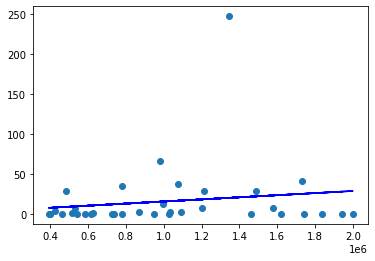

In [29]:
plt.scatter(x,y)
plt.plot(x,regr.predict(x), c='blue')
plt.show()

# x축=철새수
# y축=발생건수

In [30]:
result=[]
#num=C
for i in C:
    result.append(np.round(regr.predict([[i]]),0))

In [31]:
result

[array([11.]),
 array([19.]),
 array([7.]),
 array([10.]),
 array([3.]),
 array([3.]),
 array([8.]),
 array([4.]),
 array([3.]),
 array([12.]),
 array([5.]),
 array([16.]),
 array([26.]),
 array([6.]),
 array([47.]),
 array([5.]),
 array([8.]),
 array([15.]),
 array([4.]),
 array([7.]),
 array([3.]),
 array([2.]),
 array([7.]),
 array([3.]),
 array([3.]),
 array([7.]),
 array([3.]),
 array([9.]),
 array([12.]),
 array([4.]),
 array([34.]),
 array([4.]),
 array([8.]),
 array([17.]),
 array([3.]),
 array([5.]),
 array([3.]),
 array([2.]),
 array([5.]),
 array([4.]),
 array([3.]),
 array([4.]),
 array([2.]),
 array([5.]),
 array([5.]),
 array([3.]),
 array([18.]),
 array([4.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([

In [32]:
R=result
R

[array([11.]),
 array([19.]),
 array([7.]),
 array([10.]),
 array([3.]),
 array([3.]),
 array([8.]),
 array([4.]),
 array([3.]),
 array([12.]),
 array([5.]),
 array([16.]),
 array([26.]),
 array([6.]),
 array([47.]),
 array([5.]),
 array([8.]),
 array([15.]),
 array([4.]),
 array([7.]),
 array([3.]),
 array([2.]),
 array([7.]),
 array([3.]),
 array([3.]),
 array([7.]),
 array([3.]),
 array([9.]),
 array([12.]),
 array([4.]),
 array([34.]),
 array([4.]),
 array([8.]),
 array([17.]),
 array([3.]),
 array([5.]),
 array([3.]),
 array([2.]),
 array([5.]),
 array([4.]),
 array([3.]),
 array([4.]),
 array([2.]),
 array([5.]),
 array([5.]),
 array([3.]),
 array([18.]),
 array([4.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([2.]),
 array([

In [33]:
print(regr.coef_, regr.intercept_)

[1.31015594e-05] 2.4421347520418344


In [34]:
df897.to_csv("birds_risk_table2.csv", encoding='utf-8-sig')

NameError: name 'df897' is not defined